In [2]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report

import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers, models

In [54]:
import seaborn as sns

sns.set_style("whitegrid")

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Neural_Networks/sensor.csv')
df.shape

(220320, 55)

In [4]:
df.columns

Index(['Unnamed: 0', 'timestamp', 'sensor_00', 'sensor_01', 'sensor_02',
       'sensor_03', 'sensor_04', 'sensor_05', 'sensor_06', 'sensor_07',
       'sensor_08', 'sensor_09', 'sensor_10', 'sensor_11', 'sensor_12',
       'sensor_13', 'sensor_14', 'sensor_15', 'sensor_16', 'sensor_17',
       'sensor_18', 'sensor_19', 'sensor_20', 'sensor_21', 'sensor_22',
       'sensor_23', 'sensor_24', 'sensor_25', 'sensor_26', 'sensor_27',
       'sensor_28', 'sensor_29', 'sensor_30', 'sensor_31', 'sensor_32',
       'sensor_33', 'sensor_34', 'sensor_35', 'sensor_36', 'sensor_37',
       'sensor_38', 'sensor_39', 'sensor_40', 'sensor_41', 'sensor_42',
       'sensor_43', 'sensor_44', 'sensor_45', 'sensor_46', 'sensor_47',
       'sensor_48', 'sensor_49', 'sensor_50', 'sensor_51', 'machine_status'],
      dtype='object')

In [5]:
df.head(2)

,Unnamed: 0,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.31076,634.375,76.45975,13.41146,16.13136,...,41.92708,39.6412,65.68287,50.92593,38.19444,157.9861,67.70834,243.0556,201.3889,NORMAL
1,1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.31076,634.375,76.45975,13.41146,16.13136,...,41.92708,39.6412,65.68287,50.92593,38.19444,157.9861,67.70834,243.0556,201.3889,NORMAL


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220320 entries, 0 to 220319
Data columns (total 55 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      220320 non-null  int64  
 1   timestamp       220320 non-null  object 
 2   sensor_00       210112 non-null  float64
 3   sensor_01       219951 non-null  float64
 4   sensor_02       220301 non-null  float64
 5   sensor_03       220301 non-null  float64
 6   sensor_04       220301 non-null  float64
 7   sensor_05       220301 non-null  float64
 8   sensor_06       215522 non-null  float64
 9   sensor_07       214869 non-null  float64
 10  sensor_08       215213 non-null  float64
 11  sensor_09       215725 non-null  float64
 12  sensor_10       220301 non-null  float64
 13  sensor_11       220301 non-null  float64
 14  sensor_12       220301 non-null  float64
 15  sensor_13       220301 non-null  float64
 16  sensor_14       220299 non-null  float64
 17  sensor_15 

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.isnull().sum()

,0
Unnamed: 0,0
timestamp,0
sensor_00,10208
sensor_01,369
sensor_02,19
sensor_03,19
sensor_04,19
sensor_05,19
sensor_06,4798
sensor_07,5451


In [9]:
df['machine_status'].value_counts()

,count
machine_status,
NORMAL,205836
RECOVERING,14477
BROKEN,7


In [10]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.sort_values('timestamp').reset_index(drop=True)

In [11]:
cols_all_nan = [c for c in df.columns if df[c].isna().all()]
print("Colunas que estao totalmente vazias:", cols_all_nan)
df = df.drop(columns=cols_all_nan)

Colunas que estao totalmente vazias: ['sensor_15']


In [12]:
sensor_cols = [c for c in df.columns if c.startswith("sensor_")]
print("Total de sensores:", len(sensor_cols))

Total de sensores: 51


In [13]:
for c in sensor_cols:
    df[c] = df[c].astype(float)
    df[c] = df[c].fillna(df[c].mean())

In [15]:
df.drop(columns=["Unnamed: 0"], inplace=True)
df.shape

(220320, 54)

In [16]:
mask = (df["timestamp"] >= "2018-07-01") & (df["timestamp"] <= "2018-08-31")
df_small = df.loc[mask].reset_index(drop=True)

df_small["timestamp"].min(), df_small["timestamp"].max(), df_small.shape

(Timestamp('2018-07-01 00:00:00'),
 Timestamp('2018-08-31 00:00:00'),
 (87841, 54))

In [17]:
variances = df_small[sensor_cols].var().sort_values(ascending=False)

In [18]:
top_sensors = list(variances.head(10).index)
top_sensors

['sensor_28',
 'sensor_27',
 'sensor_04',
 'sensor_32',
 'sensor_51',
 'sensor_31',
 'sensor_36',
 'sensor_26',
 'sensor_48',
 'sensor_23']

In [20]:
sensor_cols_reduced = top_sensors
df_reduced = df_small[ ["timestamp", "machine_status"] + sensor_cols_reduced ].copy()

In [22]:
df_reduced["is_normal"] = (df_reduced["machine_status"] == "NORMAL").astype(int)
df_reduced.head(2)

,timestamp,machine_status,sensor_28,sensor_27,sensor_04,sensor_32,sensor_51,sensor_31,sensor_36,sensor_26,sensor_48,sensor_23,is_normal
0,2018-07-01 00:00:00,RECOVERING,1060.938,515.0639,3.145254,883.2537,1000.0,890.6249,689.0231,921.9127,27.199074,1091.772,0
1,2018-07-01 00:01:00,RECOVERING,1060.938,515.0639,3.145254,883.2537,1000.0,890.6249,689.0231,921.9127,27.199074,1091.772,0


In [23]:
df_normal = df_reduced[df_reduced["is_normal"] == 1].copy()
df_normal.shape

(82332, 13)

In [24]:
df_normal.timestamp.min(), df_normal.timestamp.max()

(Timestamp('2018-07-04 17:51:00'), Timestamp('2018-08-31 00:00:00'))

In [26]:
scaler = StandardScaler()
scaler.fit(df_normal[sensor_cols_reduced])

df_scaled = df.copy()
df_scaled[sensor_cols_reduced] = scaler.transform(df_scaled[sensor_cols_reduced])

df_scaled.head()

,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,...,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status,is_normal
0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,0.110221,76.45975,13.41146,16.13136,15.56713,...,39.641200,65.68287,50.92593,38.194440,-0.817775,67.70834,243.0556,0.071842,NORMAL,1
1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,0.110221,76.45975,13.41146,16.13136,15.56713,...,39.641200,65.68287,50.92593,38.194440,-0.817775,67.70834,243.0556,0.071842,NORMAL,1
2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,0.208591,73.54598,13.32465,16.03733,15.61777,...,39.351852,65.39352,51.21528,38.194443,-0.846282,67.12963,241.3194,0.129870,NORMAL,1
3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,-0.025984,76.98898,13.31742,16.24711,15.69734,...,39.062500,64.81481,51.21528,38.194440,-0.846282,66.84028,240.4514,0.115363,NORMAL,1
4,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,0.155622,76.58897,13.35359,16.21094,15.69734,...,38.773150,65.10416,51.79398,38.773150,-0.813702,66.55093,242.1875,0.071842,NORMAL,1


In [27]:
def create_sequences(data, seq_len: int):
    sequences = []
    for i in range(len(data) - seq_len + 1):
        seq = data[i:i+seq_len]
        sequences.append(seq)
    return np.array(sequences, dtype=np.float32)

In [28]:
seq_len = 50

In [31]:
data_normal = df_scaled[df_scaled["is_normal"] == 1][sensor_cols_reduced].values
X_train = create_sequences(data_normal, seq_len)

In [32]:
print("X_train shape:", X_train.shape)

X_train shape: (205787, 50, 10)


In [33]:
data_all = df_scaled[sensor_cols_reduced].values
status_all = df_scaled["is_normal"].values

In [34]:
X_all = create_sequences(data_all, seq_len)

In [35]:
y_all = []
for i in range(len(status_all) - seq_len + 1):
    window_status = status_all[i:i+seq_len]
    label = 1 if np.all(window_status == 1) else 0
    y_all.append(label)

In [36]:
y_all = np.array(y_all, dtype=int)

In [37]:
print("X_all shape:", X_all.shape)
print("y_all shape:", y_all.shape)
print("Distribuicao janelas (0=anomalia,1=normal):", np.bincount(y_all))

X_all shape: (220271, 50, 10)
y_all shape: (220271,)
Distribuicao janelas (0=anomalia,1=normal): [ 14827 205444]


In [38]:
timesteps = X_train.shape[1]
num_features = X_train.shape[2]

In [39]:
inputs = layers.Input(shape=(timesteps, num_features))

Tive que diminuir o tamanho do modelo, porque estava estourando a RAM

In [40]:
x = layers.LSTM(32, return_sequences=False)(inputs)
latent = layers.Dense(8, activation="relu", name="latent_vector")(x)

In [41]:
x = layers.RepeatVector(timesteps)(latent)
x = layers.LSTM(32, return_sequences=True)(x)
outputs = layers.TimeDistributed(layers.Dense(num_features))(x)

In [42]:
autoencoder = models.Model(inputs, outputs)
autoencoder.compile(optimizer="adam", loss="mse")

autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 50, 10)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 32)             │         5,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ latent_vector (Dense)           │ (None, 8)              │           264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector (RepeatVector)    │ (None, 50, 8)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50, 32)         │         5,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed                │ (None, 50, 10)         │           330 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,346 (44.32 KB)

 Trainable params: 11,346 (44.32 KB)

 Non-trainable params: 0 (0.00 B)

Colocando apenas 5 epocas, mesmo usando a GPU do colab, a RAM esta estourando

In [43]:
with tf.device("/GPU:0"):
    history = autoencoder.fit(
        X_train, X_train,
        epochs=5,
        batch_size=64,
        validation_split=0.2,
        shuffle=True
    )

Epoch 1/5
2573/2573 ━━━━━━━━━━━━━━━━━━━━ 42s 14ms/step - loss: 1.4052 - val_loss: 0.8057
Epoch 2/5
2573/2573 ━━━━━━━━━━━━━━━━━━━━ 33s 13ms/step - loss: 0.1819 - val_loss: 0.6968
Epoch 3/5
2573/2573 ━━━━━━━━━━━━━━━━━━━━ 34s 13ms/step - loss: 0.1347 - val_loss: 0.6742
Epoch 4/5
2573/2573 ━━━━━━━━━━━━━━━━━━━━ 38s 15ms/step - loss: 0.1234 - val_loss: 0.6639
Epoch 5/5
2573/2573 ━━━━━━━━━━━━━━━━━━━━ 37s 14ms/step - loss: 0.1179 - val_loss: 0.7036


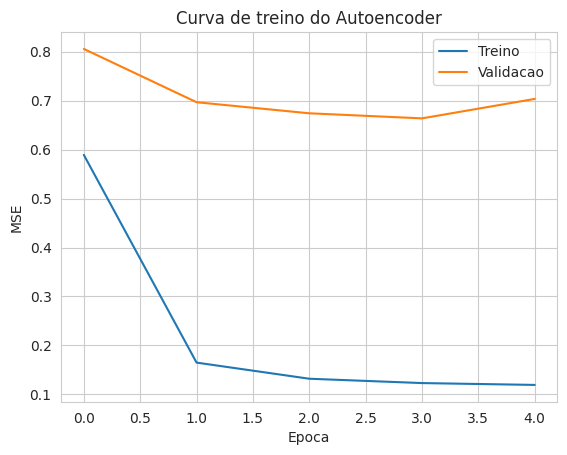

In [55]:
plt.plot(history.history["loss"], label="Treino")
plt.plot(history.history["val_loss"], label="Validacao")
plt.xlabel("Epoca")
plt.ylabel("MSE")
plt.title("Curva de treino do Autoencoder")
plt.legend()
plt.show()

In [45]:
X_all_pred = autoencoder.predict(X_all)

6884/6884 ━━━━━━━━━━━━━━━━━━━━ 33s 5ms/step


In [46]:
reconstruction_error = np.mean(
    np.mean((X_all_pred - X_all) ** 2, axis=2),
    axis=1
)

In [47]:
print("reconstruction_error shape:", reconstruction_error.shape)

reconstruction_error shape: (220271,)


In [48]:
errors_normal = reconstruction_error[y_all == 1]

threshold = errors_normal.mean() + 3 * errors_normal.std()
print("Threshold de anomalia:", threshold)

y_pred = (reconstruction_error <= threshold).astype(int)

print("Matriz de confusao (linhas = verdadeiro, colunas = predito):")
print(confusion_matrix(y_all, y_pred))

print("\nRelatorio de classificacao:")
print(classification_report(y_all, y_pred, target_names=["anomalia", "normal"]))

Threshold de anomalia: 2.1489527
Matriz de confusao (linhas = verdadeiro, colunas = predito):
[[  5473   9354]
 [  4498 200946]]

Relatorio de classificacao:
              precision    recall  f1-score   support

    anomalia       0.55      0.37      0.44     14827
      normal       0.96      0.98      0.97    205444

    accuracy                           0.94    220271
   macro avg       0.75      0.67      0.70    220271
weighted avg       0.93      0.94      0.93    220271



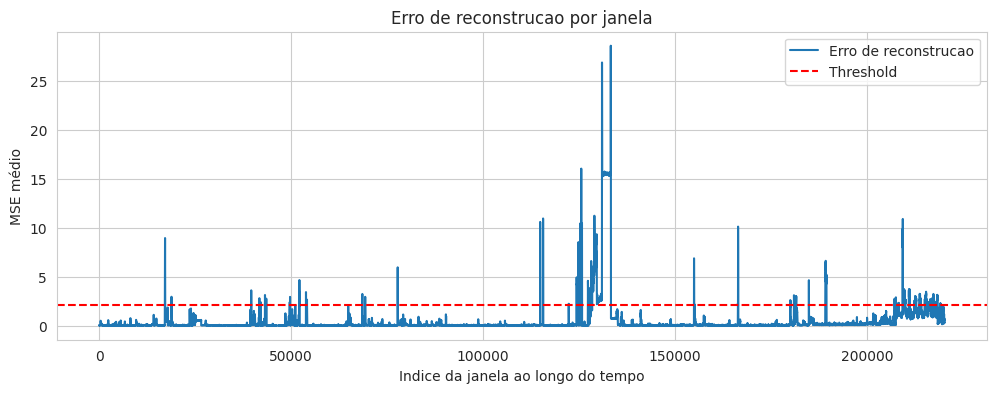

In [56]:
plt.figure(figsize=(12,4))
plt.plot(reconstruction_error, label="Erro de reconstrucao")
plt.axhline(threshold, color="red", linestyle="--", label="Threshold")
plt.title("Erro de reconstrucao por janela")
plt.xlabel("Indice da janela ao longo do tempo")
plt.ylabel("MSE médio")
plt.legend()
plt.show()


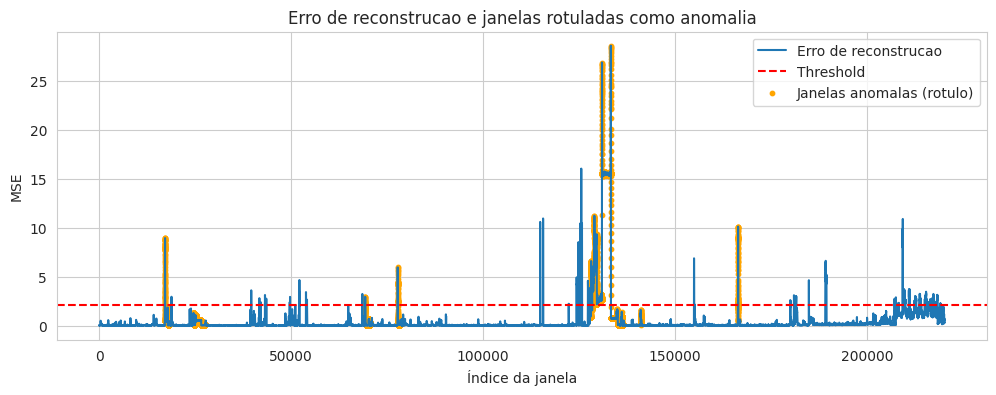

In [57]:
plt.figure(figsize=(12,4))
plt.plot(reconstruction_error, label="Erro de reconstrucao")
plt.axhline(threshold, color="red", linestyle="--", label="Threshold")

anom_idx = np.where(y_all == 0)[0]
plt.scatter(anom_idx, reconstruction_error[anom_idx], color="orange", s=10, label="Janelas anomalas (rotulo)")

plt.title("Erro de reconstrucao e janelas rotuladas como anomalia")
plt.xlabel("Índice da janela")
plt.ylabel("MSE")
plt.legend()
plt.show()


In [51]:
encoder = models.Model(inputs, latent)

latent_vectors = encoder.predict(X_all)
print("latent_vectors shape:", latent_vectors.shape)

6884/6884 ━━━━━━━━━━━━━━━━━━━━ 26s 4ms/step
latent_vectors shape: (220271, 8)


In [52]:
pca = PCA(n_components=2)
latent_2d = pca.fit_transform(latent_vectors)

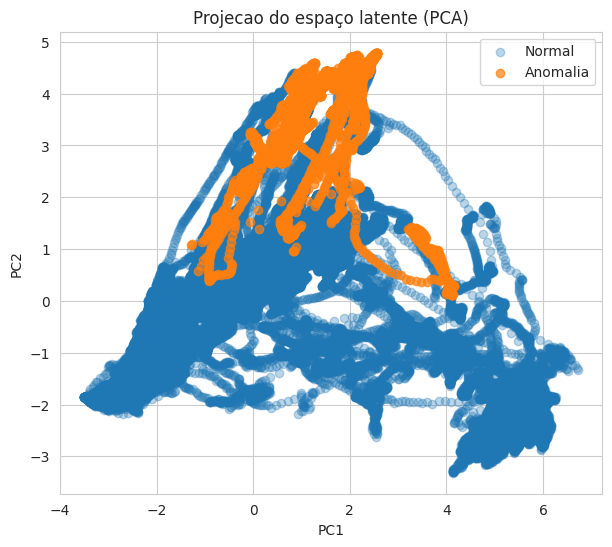

In [58]:
plt.figure(figsize=(7,6))
plt.scatter(
    latent_2d[y_all == 1, 0], latent_2d[y_all == 1, 1],
    alpha=0.3, label="Normal"
)
plt.scatter(
    latent_2d[y_all == 0, 0], latent_2d[y_all == 0, 1],
    alpha=0.7, label="Anomalia"
)
plt.legend()
plt.title("Projecao do espaço latente (PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()
